In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from statsmodels.tsa.seasonal import STL, seasonal_decompose
from helpers import clean_google, stitch_series, plot_missing
import seaborn as sns

<h3>Google Trends Data</h3>

In [2]:
# Import folder path from config file
from config import GOOGLE_PATH
path = GOOGLE_PATH

# List all files in google_search_trends folder
all_files = [file for file in os.listdir(path)]

# Create dict for abbreviation mapping
cantons = {'Zürich':'ZH', 'Zug':'ZG', 'Uri':'UR', 'Nidwalden':'NW', 'Obwalden':'OW', 'Thurgau':'TG', 'Freiburg':'FR', 'Neuenburg':'NE', 'Genf':'GE', 'Jura':'JU', 'Wallis':'VS', 'Waadt':'VD', 'Graubünden':'GR', 'Sankt_Gallen':'SG', 'Tessin':'TI', 'Schwyz':'SZ', 'Schaffhausen':'SH', 'Luzern':'LU', 'Glarus':'GL', 'Basel-Stadt':'BS', 'Basel-Landschaft':'BL', 'Bern':'BE', 'Aargau':'AG', 'Appenzell_Innerrhoden':'AI', 'Appenzell_Ausserrhoden':'AR', 'Solothurn':'SO'}  
# Reverse for reverse lookup
cantons_rev = dict()
for key, value in cantons.items():
    cantons_rev[value] = key

In [3]:
# Load countrywide data
ch_2013 = clean_google(pd.read_csv(path+f'2013_CH_google_trend.csv', skiprows=2))
ch_2017 = clean_google(pd.read_csv(path+f'2017_CH_google_trend.csv', skiprows=2))
ch_2022 = clean_google(pd.read_csv(path+f'2022_CH_google_trend.csv', skiprows=2))

# Merge country data
ch_merge = stitch_series('Schweiz', ch_2013, ch_2017)
ch_merge = stitch_series('Schweiz', ch_merge, ch_2022)
google_trends_ch = ch_merge.copy()

# Add cantonal data
for canton in cantons.keys():
    # Load cantonal data from folder
    file_names = list(filter(lambda x: cantons[canton] in x, all_files))
    canton_2013 = clean_google(pd.read_csv(path+f'2013_{cantons[canton]}_google_trend.csv', skiprows=2))
    canton_2017 = clean_google(pd.read_csv(path+f'2017_{cantons[canton]}_google_trend.csv', skiprows=2))
    canton_2022 = clean_google(pd.read_csv(path+f'2022_{cantons[canton]}_google_trend.csv', skiprows=2))

    # Merge cantonal data
    canton_merge = stitch_series(canton, canton_2013, canton_2017)
    canton_merge = stitch_series(canton, canton_merge, canton_2022)

    # Append to 
    google_trends_ch = pd.concat([google_trends_ch, canton_merge])

# Transpose
google_trends_ch = google_trends_ch.T

In [4]:
ai_2017 = clean_google(pd.read_csv(path+f'2017_AI_google_trend.csv', skiprows=2))
ai_2022 = clean_google(pd.read_csv(path+f'2022_AI_google_trend.csv', skiprows=2))

In [5]:
ai_2017

Woche                            2017-11-05  2017-11-12  2017-11-19  \
canton                query                                           
Appenzell_Innerrhoden Influenza           0           0           0   
                      influenza           0           0           0   
                      Grippe              0           0           0   
                      Flu                 0           0           0   

Woche                            2017-11-26  2017-12-03  2017-12-10  \
canton                query                                           
Appenzell_Innerrhoden Influenza           0           0           0   
                      influenza           0           0           0   
                      Grippe              0           0           0   
                      Flu                 0           0           0   

Woche                            2017-12-17  2017-12-24  2017-12-31  \
canton                query                                           
Appenzell_Innerrhoden Influenza           0           0           0   
                      influenza           0           0           0   
                      Grippe              0           0           0   
                      Flu                 0           0           0   

Woche                            2018-01-07  ...  2022-10-23  2022-10-30  \
canton                query                  ...                           
Appenzell_Innerrhoden Influenza          54  ...           0           0   
                      influenza           0  ...           0           0   
                      Grippe              0  ...           0           0   
                      Flu                 0  ...           0           0   

Woche                            2022-11-06  2022-11-13  2022-11-20  \
canton                query                                           
Appenzell_Innerrhoden Influenza           0          26           0   
                      influenza           0           0           0   
                      Grippe              0           0           0   
                      Flu                 0           0           0   

Woche                            2022-11-27  2022-12-04  2022-12-11  \
canton                query                                           
Appenzell_Innerrhoden Influenza           0           0           0   
                      influenza           0           0           0   
                      Grippe              0           0           0   
                      Flu                 0           0           0   

Woche                            2022-12-18  2022-12-25  
canton                query                              
Appenzell_Innerrhoden Influenza           0          12  
                      influenza           0           0  
                      Grippe              0          35  
                      Flu                 0           0  

[4 rows x 269 columns]

In [6]:
stitch_series('Appenzell_Innerrhoden', ai_2017, ai_2022)

Woche                            2017-11-05  2017-11-12  2017-11-19  \
canton                query                                           
Appenzell_Innerrhoden Influenza         0.0         0.0         0.0   
                      influenza         0.0         0.0         0.0   
                      Grippe            0.0         0.0         0.0   
                      Flu               0.0         0.0         0.0   

Woche                            2017-11-26  2017-12-03  2017-12-10  \
canton                query                                           
Appenzell_Innerrhoden Influenza         0.0         0.0         0.0   
                      influenza         0.0         0.0         0.0   
                      Grippe            0.0         0.0         0.0   
                      Flu               0.0         0.0         0.0   

Woche                            2017-12-17  2017-12-24  2017-12-31  \
canton                query                                           
Appenzell_Innerrhoden Influenza         0.0         0.0         0.0   
                      influenza         0.0         0.0         0.0   
                      Grippe            0.0         0.0         0.0   
                      Flu               0.0         0.0         0.0   

Woche                            2018-01-07  ...  2023-09-10  2023-09-17  \
canton                query                  ...                           
Appenzell_Innerrhoden Influenza        54.0  ...   15.108696         0.0   
                      influenza         0.0  ...    0.000000         0.0   
                      Grippe            0.0  ...    0.000000         0.0   
                      Flu               0.0  ...    0.000000         0.0   

Woche                            2023-09-24  2023-10-01  2023-10-08  \
canton                query                                           
Appenzell_Innerrhoden Influenza         0.0    15.86413    0.000000   
                      influenza         0.0     0.00000    0.000000   
                      Grippe            0.0     0.00000   19.076636   
                      Flu               0.0     0.00000    0.000000   

Woche                            2023-10-15  2023-10-22  2023-10-29  \
canton                query                                           
Appenzell_Innerrhoden Influenza         0.0         0.0         0.0   
                      influenza         0.0         0.0         0.0   
                      Grippe            0.0         0.0         0.0   
                      Flu               0.0         0.0         0.0   

Woche                            2023-11-05  2023-11-12  
canton                query                              
Appenzell_Innerrhoden Influenza         0.0    0.000000  
                      influenza         0.0    0.000000  
                      Grippe            0.0   23.655029  
                      Flu               0.0    0.000000  

[4 rows x 315 columns]

<h3>Google search activity per canton from 2013-2023</h3>

<h4>Plot search activity across all Cantons</h4>

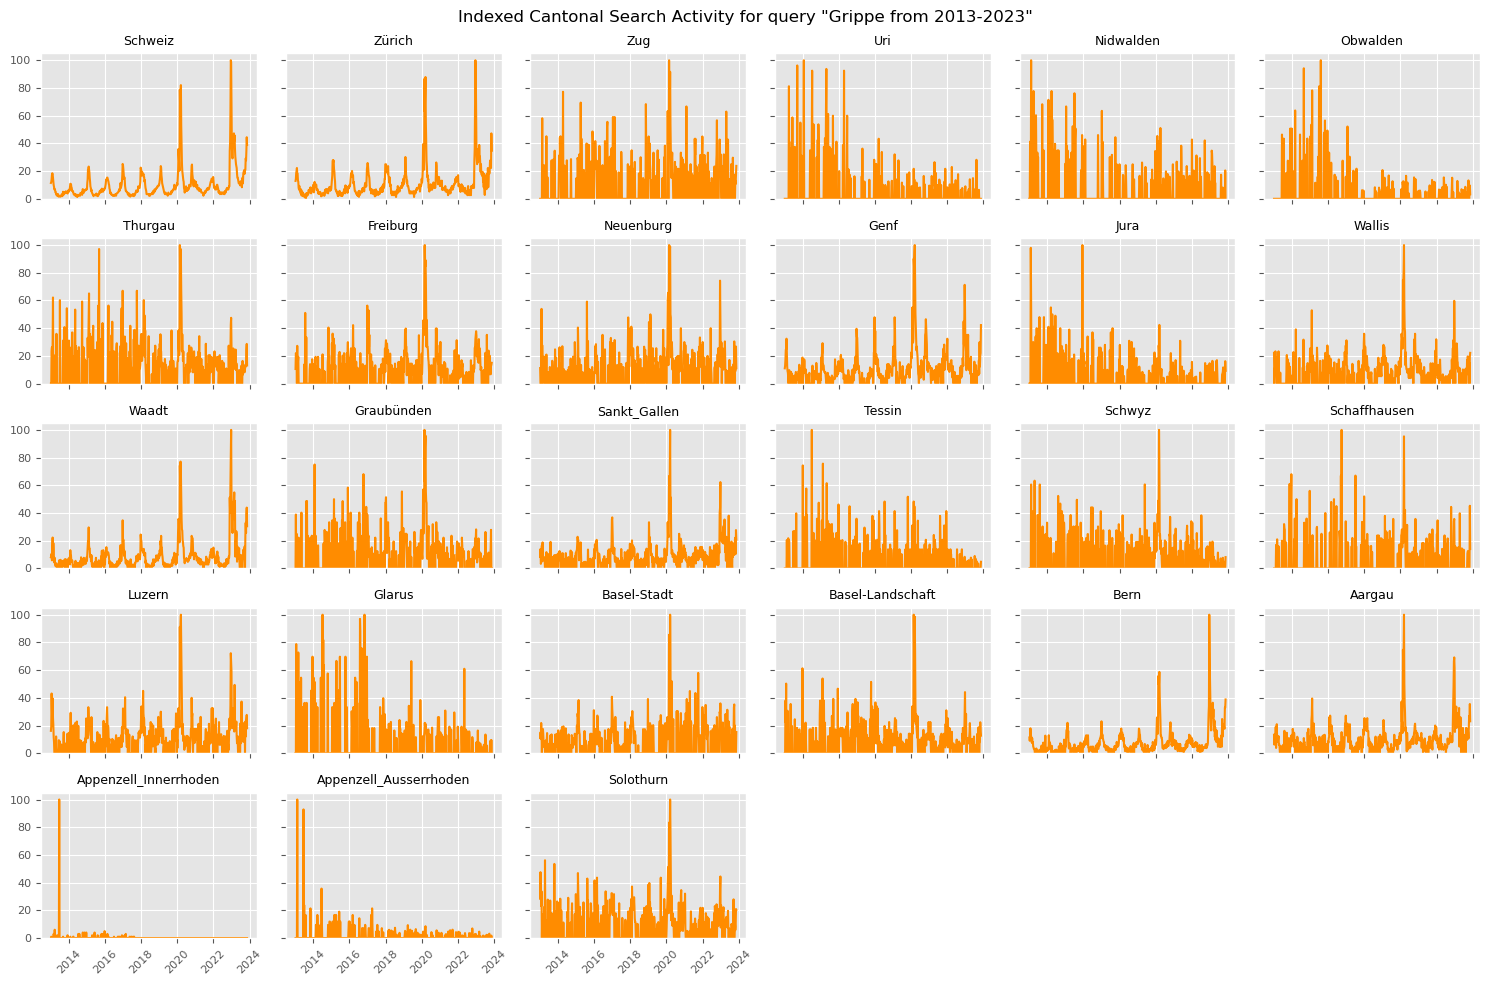

In [39]:
google_plot = google_trends_ch.copy()
google_plot.index = pd.to_datetime(google_plot.index)

# Plot each canton separately
fig, ax = plt.subplots(5, 6, figsize=(15, 10), sharex=True, sharey=True)

plt.style.use('ggplot')

# Adjust the subplots' layout
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Set a common y-axis limit
y_limit = 105

# Iterate through each subplot and plot the data
i, j = 0, 0
for canton in ['Schweiz', *cantons.keys()]:
    ax[i][j].plot(google_plot[canton, 'Grippe'], label=canton, color='darkorange')
    ax[i][j].set_title(canton, fontsize=9)
    ax[i][j].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels
    ax[i][j].tick_params(axis='both', labelsize=8)  # Set tick label size
    ax[i][j].set_ylim([0, y_limit])  # Set y-axis limit for each subplot
    
    # Move to next subplot
    if j == 5:
        i += 1
        j = 0
    else:
        j += 1

# Hide unused subplots
for p in range(i, 5):
    for q in range(j, 6):
        ax[p][q].axis('off')

# Add overarching title
plt.suptitle('Indexed Cantonal Search Activity for query "Grippe from 2013-2023"')

# Adjust overall layout
plt.tight_layout()

plt.show()

<h4>Heatmaps of missing values</h4>

In [8]:
plot_nan = google_trends_ch.copy() # Create a copy for plotting heatmaps of missing values
plot_nan.columns = plot_nan.columns.map(("_").join) # Flatten levels of dataframe from multi-index to single index
plot_nan.replace(0, np.nan, inplace=True) # Replace 0s with np.nan

# Overview of absolute count and percentage of missing values in table format
nan_count = plot_nan.loc[:, :].isnull().sum()
nan_count_pct = round(nan_count / len(plot_nan.index), 2)
nan_df = pd.DataFrame([nan_count, nan_count_pct]).T
nan_df.columns = ['count', '%']
nan_df

,count,%
Schweiz_Flu,16.0,0.03
Schweiz_Grippe,0.0,0.00
Schweiz_Influenza,0.0,0.00
Schweiz_influenza,40.0,0.07
Zürich_Flu,100.0,0.18
...,...,...
Appenzell_Ausserrhoden_influenza,461.0,0.81
Solothurn_Influenza,250.0,0.44
Solothurn_influenza,433.0,0.76
Solothurn_Grippe,261.0,0.46


/Users/thorbenklabunde/Desktop/FW23/03_DataScience/project/DSF/notebooks/helpers.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


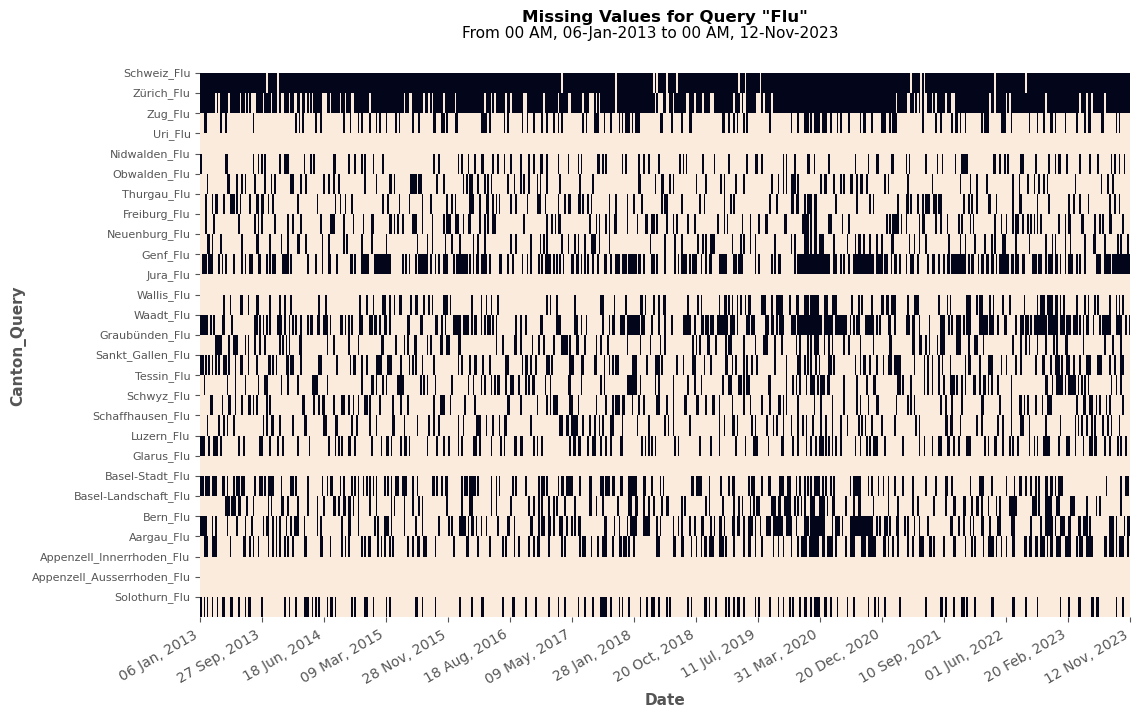

/Users/thorbenklabunde/Desktop/FW23/03_DataScience/project/DSF/notebooks/helpers.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


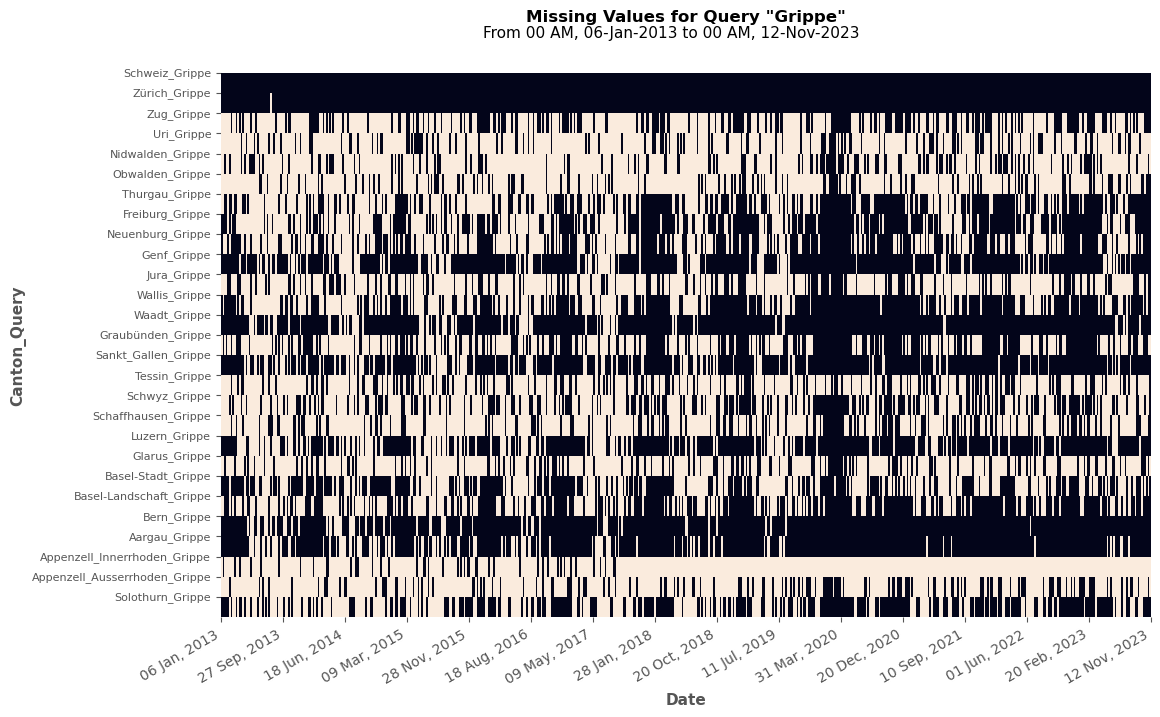

/Users/thorbenklabunde/Desktop/FW23/03_DataScience/project/DSF/notebooks/helpers.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


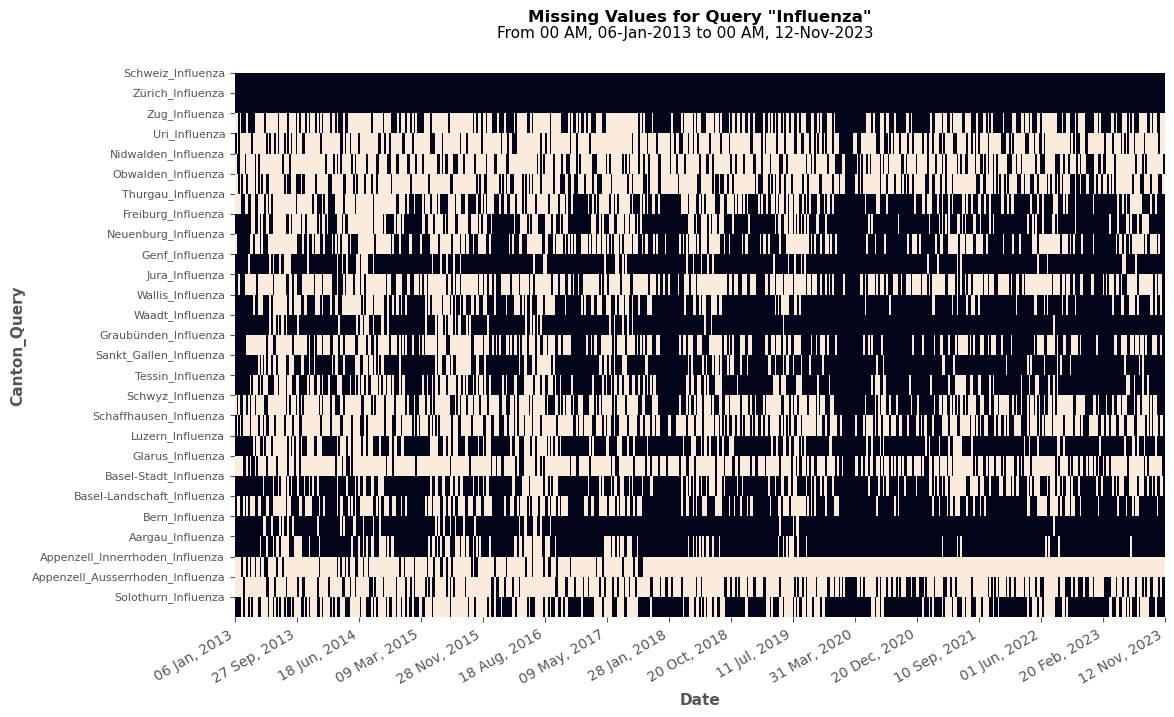

/Users/thorbenklabunde/Desktop/FW23/03_DataScience/project/DSF/notebooks/helpers.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


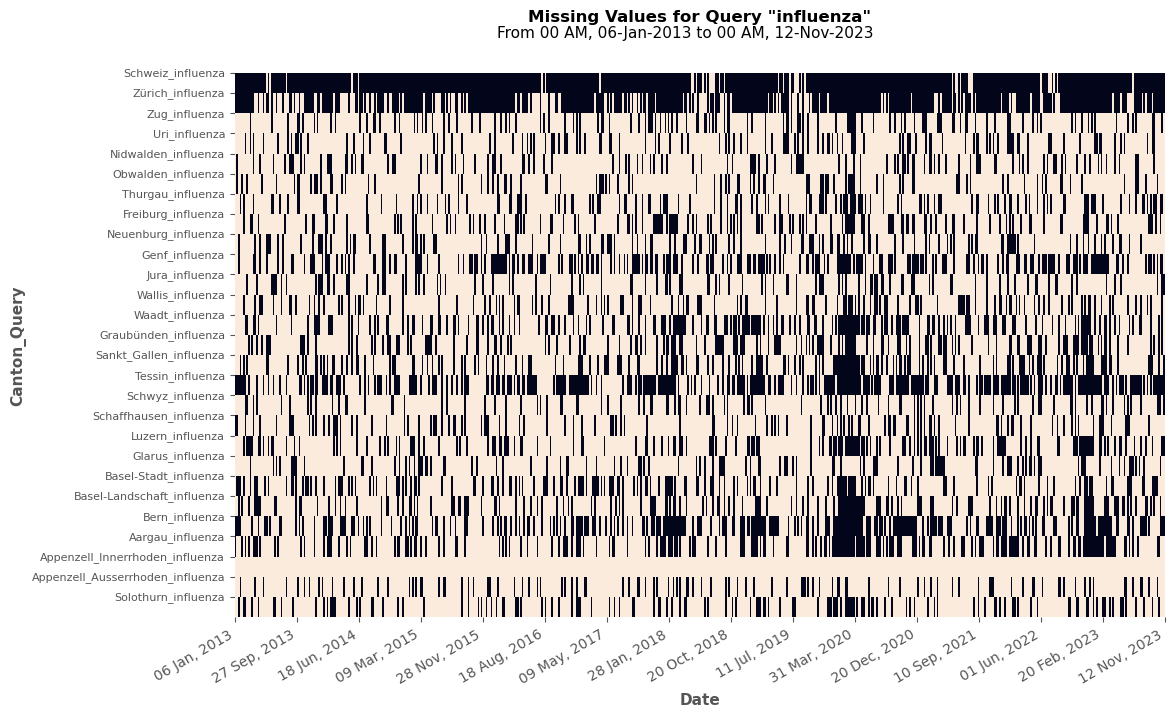

In [9]:
# Visualization of missing values through heatmaps
plot_nan.index = pd.to_datetime(plot_nan.index) # Convert index to datetime for plotting
for query in google_trends_ch.columns.levels[1]: 
    selected_columns = plot_nan.filter(like=query, axis=1)
    plot_missing(selected_columns, plot_title=f'Missing Values for Query "{query}"', figsize=(12, 8))

<h3>Aggregating Cantonal to regional level</h3>

In [10]:
# Import weekly population data per canton from Sentinella file
pop_ct = pd.read_csv("../data/INFLUENZA_oblig/data.csv")
pop_ct.head()
# Only keep aggregate observations at cantonal level 
pop_ct = pop_ct.query("sex == 'all' and type == 'all' and agegroup == 'all' and georegion_type == 'canton'")[['temporal', 'georegion', 'pop']]

pop_ct = pop_ct.pivot(index='temporal', columns='georegion', values='pop')
pop_ct.drop(columns='unknown', inplace=True)
pop_ct = pop_ct.T.reset_index().drop(columns='2012-W52')

pop_ct.rename(columns={'georegion': 'canton'}, inplace=True)
pop_ct['canton'] = list(map(lambda x: cantons_rev[x], pop_ct['canton']))
pop_ct = pop_ct.set_index('canton')


# Create dict for mapping of dates to index of calendar week for population mapping
week_dict = {}
for year in range(2013, 2024):
    weeks = list(filter(lambda x: x.startswith(f'{year}'), google_trends_ch.T.columns))

    week_dict.update({f'{week[:4]}-W{nr+1:02d}': week for nr, week in enumerate(weeks)})

pop_ct.rename(columns=week_dict, inplace=True)
pop_ct = pop_ct.T

In [11]:
import json
with open('week_dict.json', 'w') as f:
    json.dump(week_dict, f)

In [12]:
# Dictionary mapping regions to Cantons for aggregation of population
region_to_ct = {'Region_1': ['Genf', 'Neuenburg', 'Waadt', 'Wallis'], 
           'Region_2': ['Bern', 'Freiburg', 'Jura'], 
           'Region_3': ['Aargau', 'Basel-Landschaft', 'Basel-Stadt', 'Solothurn'], 
           'Region_4': ['Luzern', 'Nidwalden', 'Obwalden', 'Schwyz', 'Uri', 'Zug'], 
           'Region_5': ['Appenzell_Innerrhoden', 'Appenzell_Ausserrhoden', 'Glarus', 'Sankt_Gallen', 'Schaffhausen', 'Thurgau', 'Zürich'], 
           'Region_6': ['Graubünden', 'Tessin']}

# Insert columns for regional population numbers
for region in region_to_ct.keys():
    pop_ct[region] = pop_ct[[*region_to_ct[region]]].sum(axis=1)

# Dictionary mapping Cantons to regions for 
ct_to_reg = dict()
for key, value in region_to_ct.items():
    for ct in value:
        ct_to_reg[ct] = key

# Create new dataframe for weights as shares of regional population
ct_weights = pop_ct.copy()
for canton in cantons.keys():
    ct_weights[canton] = ct_weights[canton] / ct_weights[ct_to_reg[canton]]

In [13]:
ct_weights

canton,Aargau,Appenzell_Innerrhoden,Appenzell_Ausserrhoden,Bern,Basel-Landschaft,Basel-Stadt,Freiburg,Genf,Glarus,Graubünden,...,Waadt,Wallis,Zug,Zürich,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6
temporal,,,,,,,,,,,,,,,,,,,,,
2013-01-06,0.46593,0.006670,0.022699,0.730520,0.204026,0.138627,0.217141,0.272575,0.016739,0.360036,...,0.435121,0.189878,0.152583,0.602673,1722219.0,1370641.0,1365790.0,774123.0,2365360.0,541498.0
2013-01-13,0.46593,0.006670,0.022699,0.730520,0.204026,0.138627,0.217141,0.272575,0.016739,0.360036,...,0.435121,0.189878,0.152583,0.602673,1722219.0,1370641.0,1365790.0,774123.0,2365360.0,541498.0
2013-01-20,0.46593,0.006670,0.022699,0.730520,0.204026,0.138627,0.217141,0.272575,0.016739,0.360036,...,0.435121,0.189878,0.152583,0.602673,1722219.0,1370641.0,1365790.0,774123.0,2365360.0,541498.0
2013-01-27,0.46593,0.006670,0.022699,0.730520,0.204026,0.138627,0.217141,0.272575,0.016739,0.360036,...,0.435121,0.189878,0.152583,0.602673,1722219.0,1370641.0,1365790.0,774123.0,2365360.0,541498.0
2013-02-03,0.46593,0.006670,0.022699,0.730520,0.204026,0.138627,0.217141,0.272575,0.016739,0.360036,...,0.435121,0.189878,0.152583,0.602673,1722219.0,1370641.0,1365790.0,774123.0,2365360.0,541498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-15,0.47758,0.006373,0.021654,0.721858,0.198900,0.133160,0.227285,0.273633,0.016046,0.363785,...,0.442030,0.189715,0.155773,0.609529,1861791.0,1451080.0,1472184.0,833178.0,2567001.0,553557.0
2023-10-22,0.47758,0.006373,0.021654,0.721858,0.198900,0.133160,0.227285,0.273633,0.016046,0.363785,...,0.442030,0.189715,0.155773,0.609529,1861791.0,1451080.0,1472184.0,833178.0,2567001.0,553557.0
2023-10-29,0.47758,0.006373,0.021654,0.721858,0.198900,0.133160,0.227285,0.273633,0.016046,0.363785,...,0.442030,0.189715,0.155773,0.609529,1861791.0,1451080.0,1472184.0,833178.0,2567001.0,553557.0


In [14]:
google_trends_ch

canton        Schweiz                                      Zürich             \
query             Flu     Grippe  Influenza  influenza        Flu     Grippe   
Woche                                                                          
2013-01-06  18.889972  11.467333   7.868884  12.143553  15.952730  12.917294   
2013-01-13  18.889972  12.104407   8.705999  12.143553  15.952730  14.352549   
2013-01-20  18.889972  14.015629   9.710538  14.167479  18.231692  18.658314   
2013-01-27  22.038300  17.201000  12.221884  14.167479  13.673769  20.093568   
2013-02-03  18.889972  18.475148  12.389307  12.143553  18.231692  22.246451   
...               ...        ...        ...        ...        ...        ...   
2023-10-15   5.077250  29.166667  27.000000   3.384833   6.319779  27.777778   
2023-10-22   8.462083  27.777778  29.000000   6.769667  14.219502  23.611111   
2023-10-29  10.154500  34.722222  37.000000   6.769667  11.059613  22.222222   
2023-11-05   8.462083  44.444444  41.000000   6.769667  11.059613  47.222222   
2023-11-12   8.462083  38.888889  38.000000   6.769667  11.059613  34.722222   

canton                                  Zug             ...  \
query       Influenza  influenza  Influenza  influenza  ...   
Woche                                                   ...   
2013-01-06   9.520046  17.092211   0.000000   0.000000  ...   
2013-01-13   8.827679  10.255327   0.000000   0.000000  ...   
2013-01-20  11.077871   6.836884  14.031198   0.000000  ...   
2013-01-27  13.154972  13.673769   0.000000   0.000000  ...   
2013-02-03  14.366614   5.127663  40.778169   0.000000  ...   
...               ...        ...        ...        ...  ...   
2023-10-15  24.000000   4.739834  17.000000   0.000000  ...   
2023-10-22  28.000000   4.739834  11.000000   0.000000  ...   
2023-10-29  33.000000   6.319779   0.000000   0.000000  ...   
2023-11-05  43.000000   6.319779   0.000000  11.878795  ...   
2023-11-12  38.000000   4.739834   0.000000   0.000000  ...   

canton     Appenzell_Innerrhoden      Appenzell_Ausserrhoden            \
query                     Grippe  Flu                    Flu    Grippe   
Woche                                                                    
2013-01-06                   0.0  0.0                    0.0  0.000000   
2013-01-13                   1.0  0.0                    0.0  0.000000   
2013-01-20                   0.0  0.0                    0.0  0.000000   
2013-01-27                   0.0  0.0                    0.0  0.000000   
2013-02-03                   0.0  0.0                    0.0  0.000000   
...                          ...  ...                    ...       ...   
2023-10-15                   0.0  0.0                    0.0  0.000000   
2023-10-22                   0.0  0.0                    0.0  0.000000   
2023-10-29                   0.0  0.0                    0.0  0.000000   
2023-11-05                   0.0  0.0                    0.0  1.756611   
2023-11-12                   0.0  0.0                    0.0  0.000000   

canton                           Solothurn                                   
query      Influenza  influenza  Influenza  influenza     Grippe        Flu  
Woche                                                                        
2013-01-06  0.000000    0.00000  12.881075   0.000000  28.404423  30.337079  
2013-01-13  0.000000    0.00000  51.524302   0.000000  47.560894   0.000000  
2013-01-20  0.000000    0.00000  11.335346  58.333333  31.707263  74.157303  
2013-01-27  0.000000  100.00000  14.426804   0.000000  23.119879   0.000000  
2013-02-03  0.000000    0.00000   0.000000   0.000000  33.688966  48.314607  
...              ...        ...        ...        ...        ...        ...  
2023-10-15  0.000000    2.45001  12.064128   0.000000  10.794220  12.064128  
2023-10-22  1.386798    0.00000  13.968991   8.254404   5.714587   0.000000  
2023-10-29  0.000000    0.00000   6.984495   0.000000   8.254404   0.000000  
2023-11-05  1.109438   

In [15]:
# Add columns for weighted search activity by region
for level in google_trends_ch.columns.levels[1]:
    for region in region_to_ct.keys():
        # Initialize an empty DataFrame to store the weighted sums for each canton
        weighted_sums = pd.DataFrame()

        # Multiply the search activity for each canton by its weight and add to the DataFrame
        for canton in region_to_ct[region]:
            weighted_sums[canton] = google_trends_ch[canton, level] * ct_weights[canton]
        
        # Sum the weighted data for each canton to get the total for the region
        google_trends_ch[region, level] = weighted_sums.sum(axis=1)

Region_1: ['Genf', 'Neuenburg', 'Waadt', 'Wallis'], 
Region_2: ['Bern', 'Freiburg', 'Jura'], 
Region_3: ['Aargau', 'Basel-Landschaft', 'Basel-Stadt', 'Solothurn'], 
Region_4: ['Luzern', 'Nidwalden', 'Obwalden', 'Schwyz', 'Uri', 'Zug'], 
Region_5: ['Appenzell_Innerrhoden', 'Appenzell_Ausserrhoden', 'Glarus', 'Sankt_Gallen', 'Schaffhausen', 'Thurgau', 'Zürich'], 
Region_6: ['Graubünden', 'Tessin']


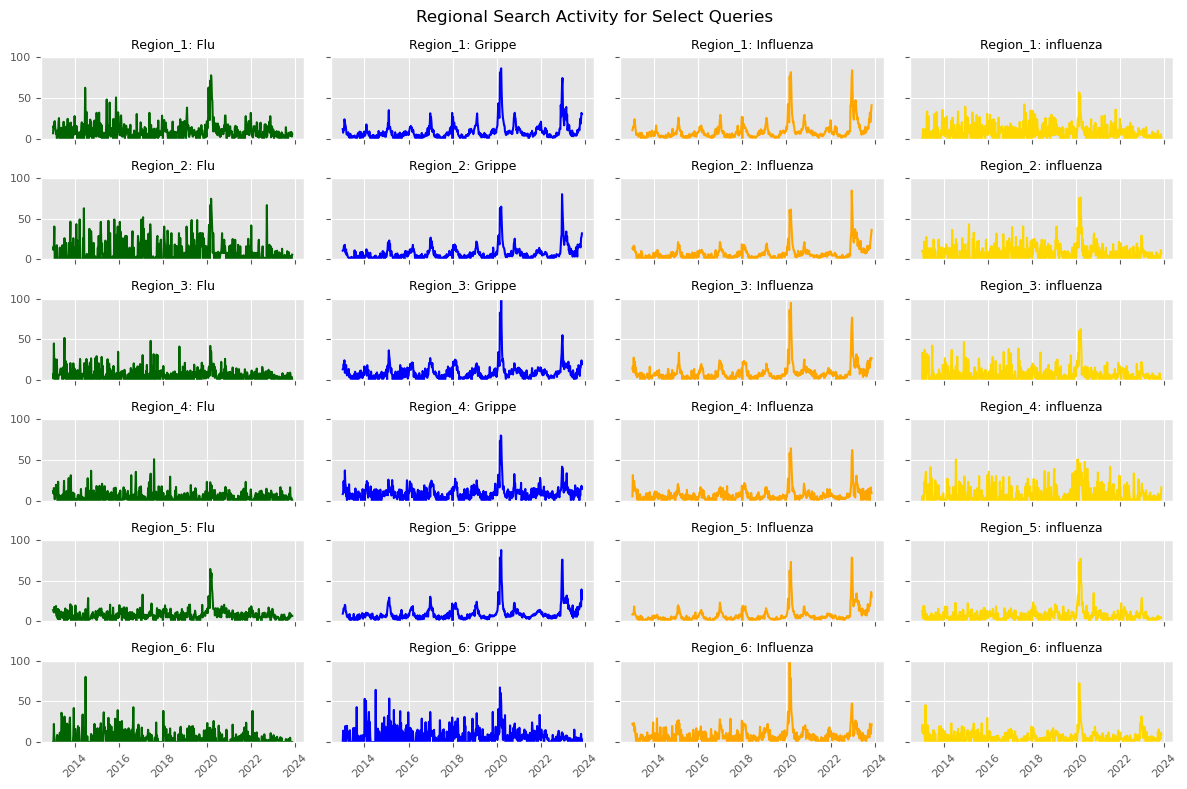

In [16]:
google_plot = google_trends_ch.copy()
google_plot.index = pd.to_datetime(google_plot.index)

# Plot regional
fig, ax = plt.subplots(6, 4, figsize=(12, 8), sharex=True, sharey=True)

# Set a common y-axis limit
y_limit = 100

# Initialize a dictionary to map queries to colors
color_dict = {'Grippe':'blue', 'Influenza':'orange', 'influenza':'gold', 'Flu':'darkgreen'}

i, j = 0, 0
for region in region_to_ct.keys():
    for query in google_plot.columns.levels[1]:
        ax[i][j].plot(google_plot[region, query], color=color_dict[query])
        ax[i][j].set_title(f'{region}: {query}', fontsize=9)
        ax[i][j].tick_params(axis='x', labelrotation=45)  # Rotate x-axis labels
        ax[i][j].tick_params(axis='both', labelsize=8)  # Set tick label size
        ax[i][j].set_ylim([0, y_limit])  # Set y-axis limit for each subplot

        j += 1
    j = 0
    i += 1

title_parts = [f'{region}: {region_to_ct[region]}' for region in region_to_ct.keys()]

# Joining the title parts with a comma and a space
title_string = ', \n'.join(title_parts)

print(title_string)

plt.suptitle('Regional Search Activity for Select Queries')

# Adjust overall layout
plt.tight_layout()


plt.show()

In [33]:
regional_corr = google_plot.loc[:, google_plot.columns.get_level_values(0).str.startswith('Region')].copy()
regional_corr.columns = list(map(lambda x: "_".join(x), regional_corr.columns))
# plot_cols = regional_corr.loc[:, regional_corr.columns.get_level_values(1).str.contains('Flu')]
# for i, (row_i, row_data) in enumerate(plot_cols.iteritems()):
#     print(row_i, row_data)

/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (row_i, row_data) in enumerate(plot_cols.iteritems()):
/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_j, col_data) in enumerate(plot_cols.iteritems()):


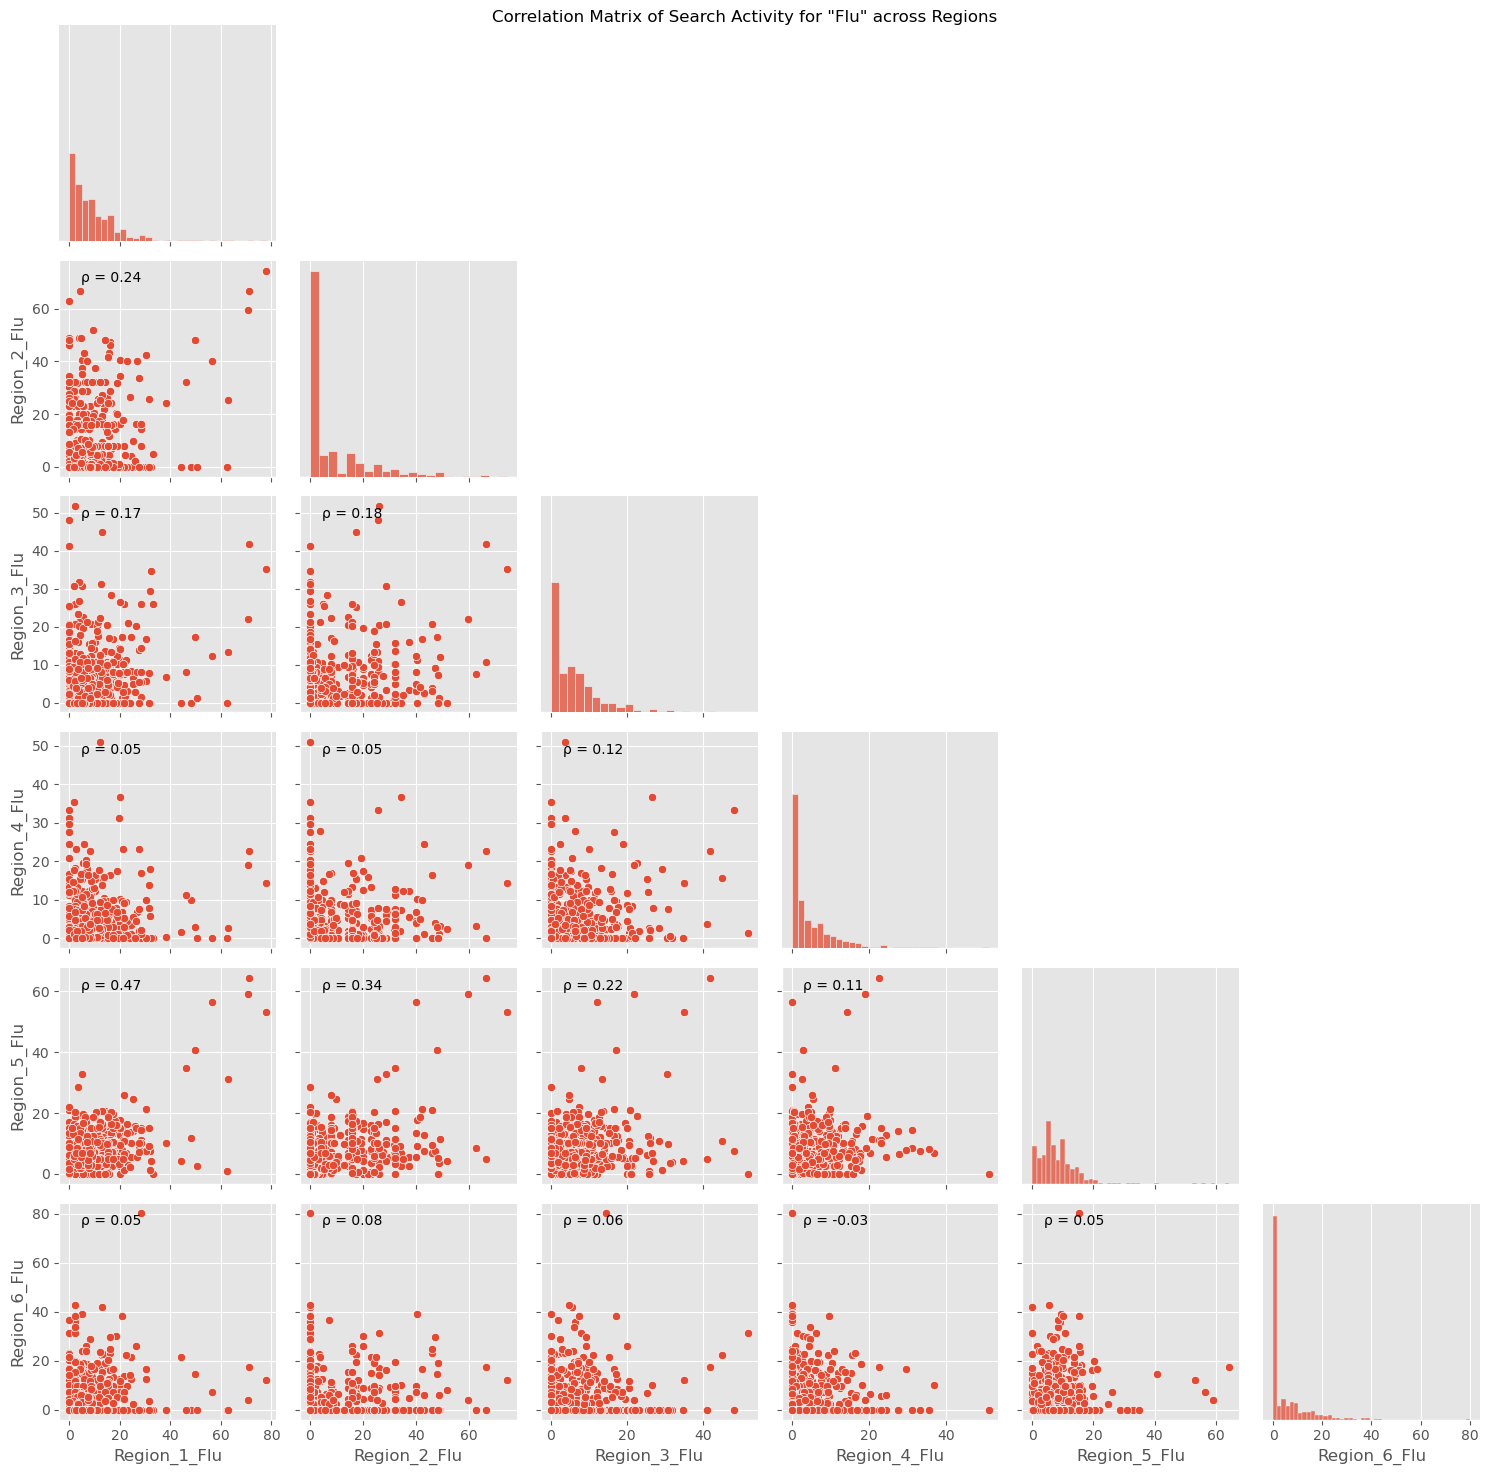

/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (row_i, row_data) in enumerate(plot_cols.iteritems()):
/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_j, col_data) in enumerate(plot_cols.iteritems()):


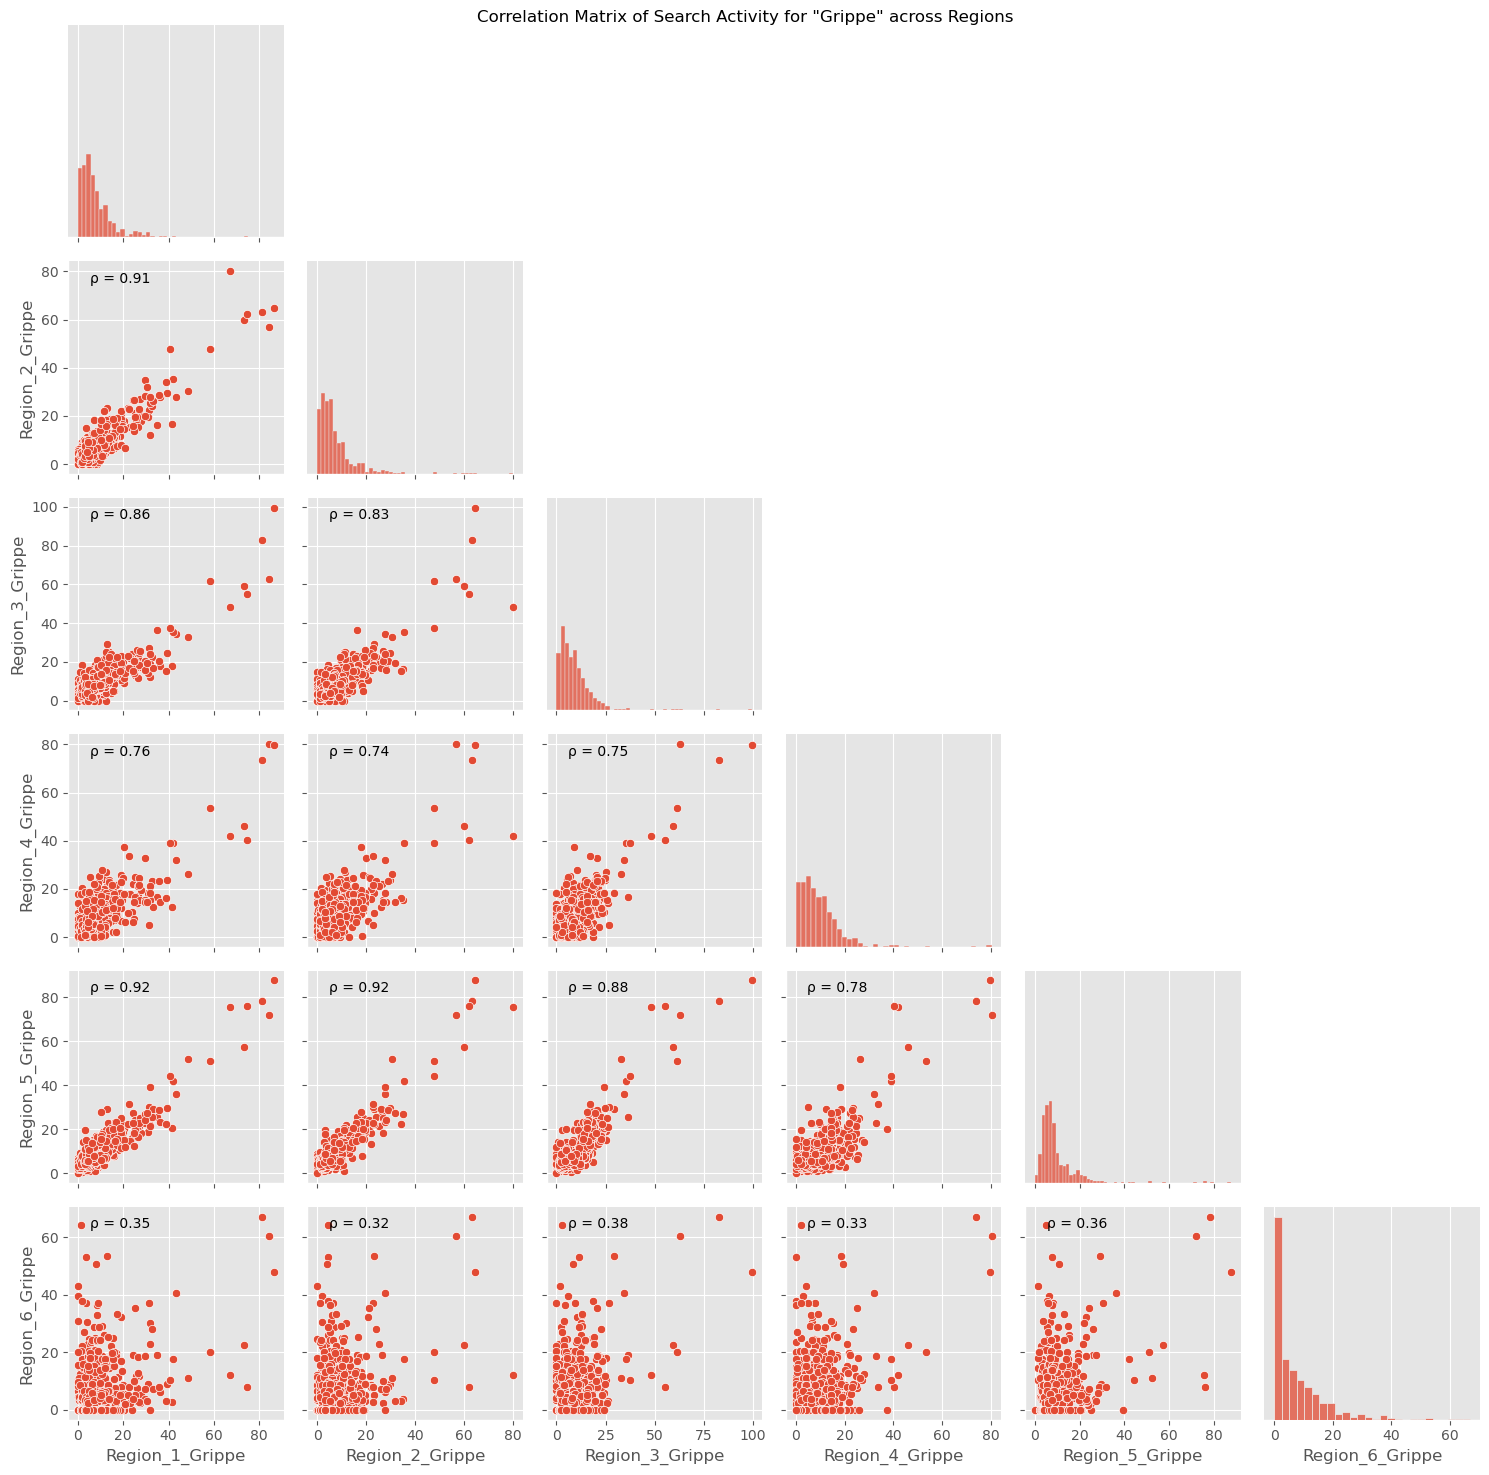

/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (row_i, row_data) in enumerate(plot_cols.iteritems()):
/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_j, col_data) in enumerate(plot_cols.iteritems()):


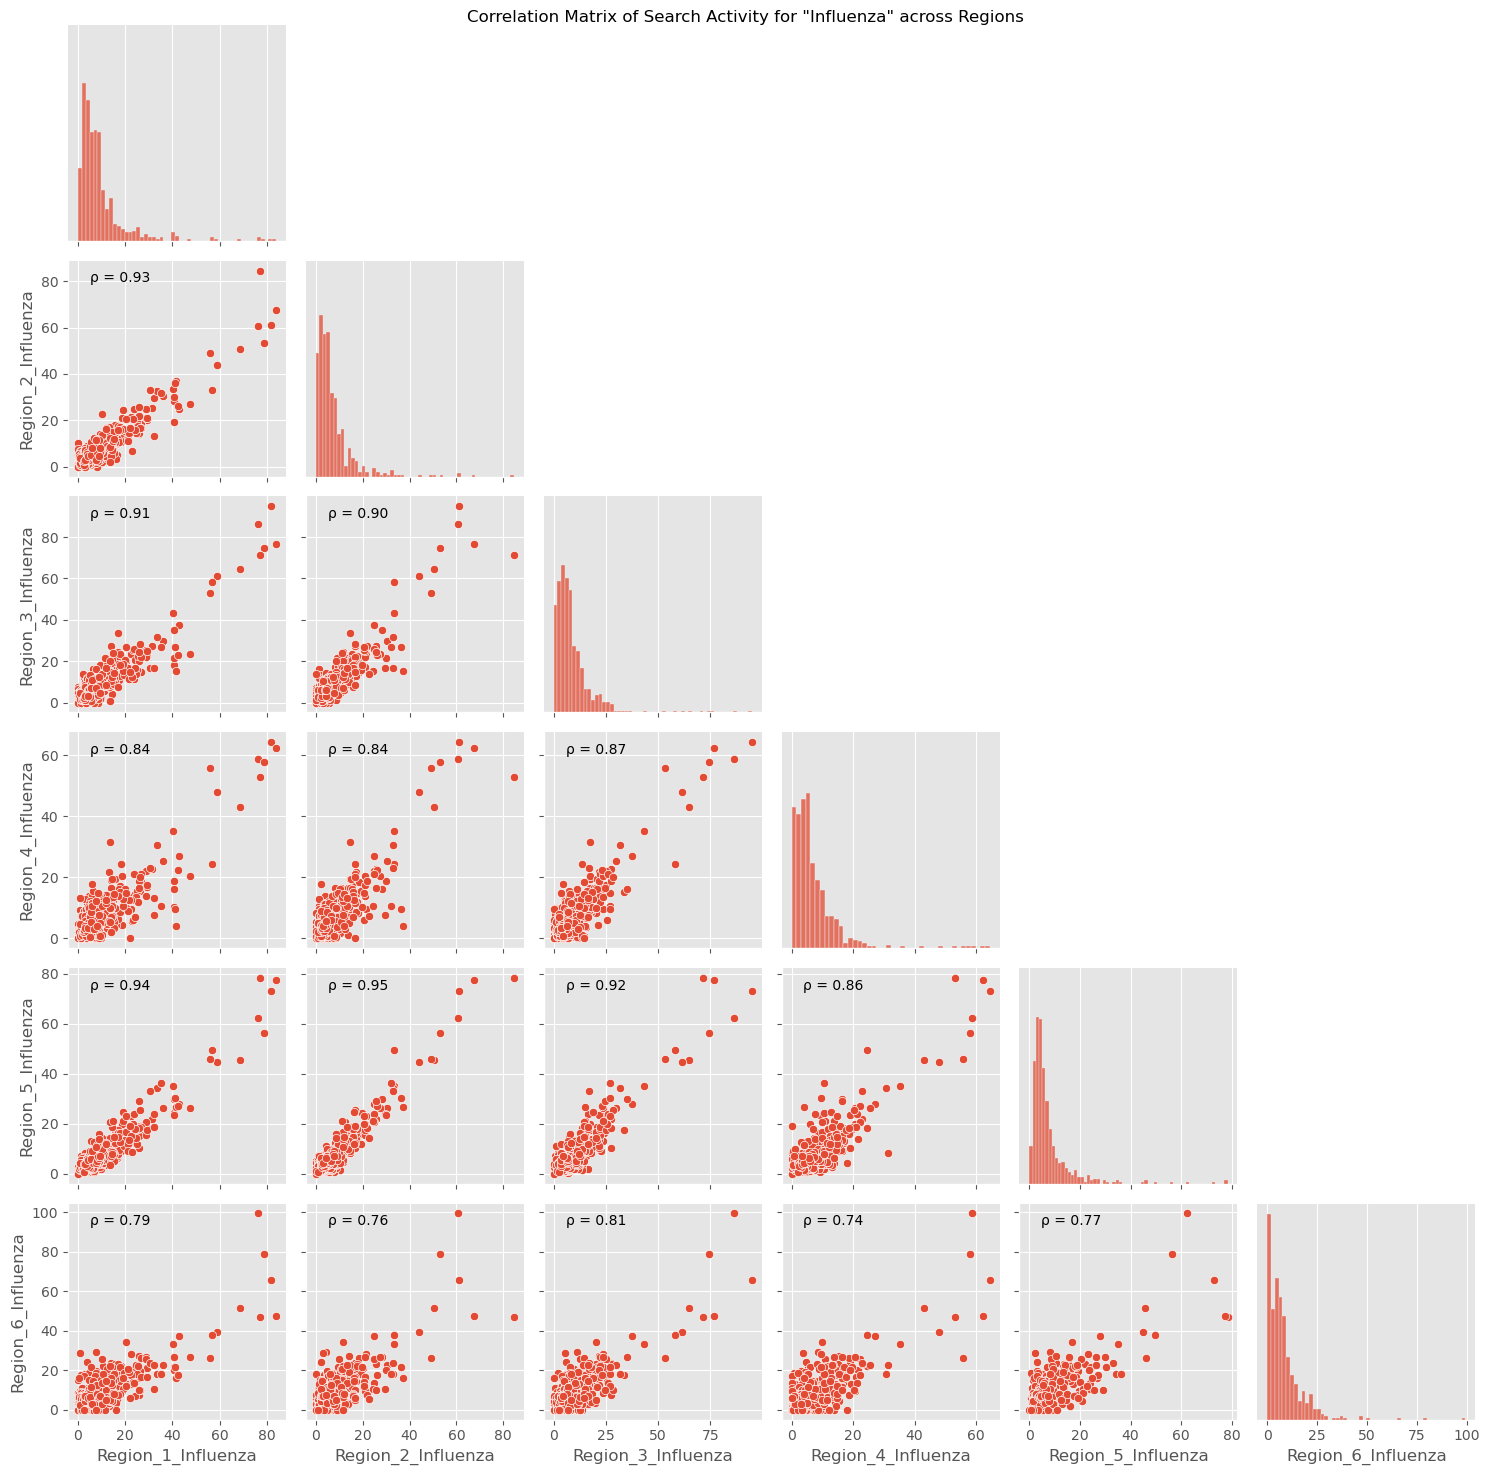

/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, (row_i, row_data) in enumerate(plot_cols.iteritems()):
/var/folders/kj/mq0jlk2574705gvzk6d37lkh0000gn/T/ipykernel_6722/128533484.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for j, (col_j, col_data) in enumerate(plot_cols.iteritems()):


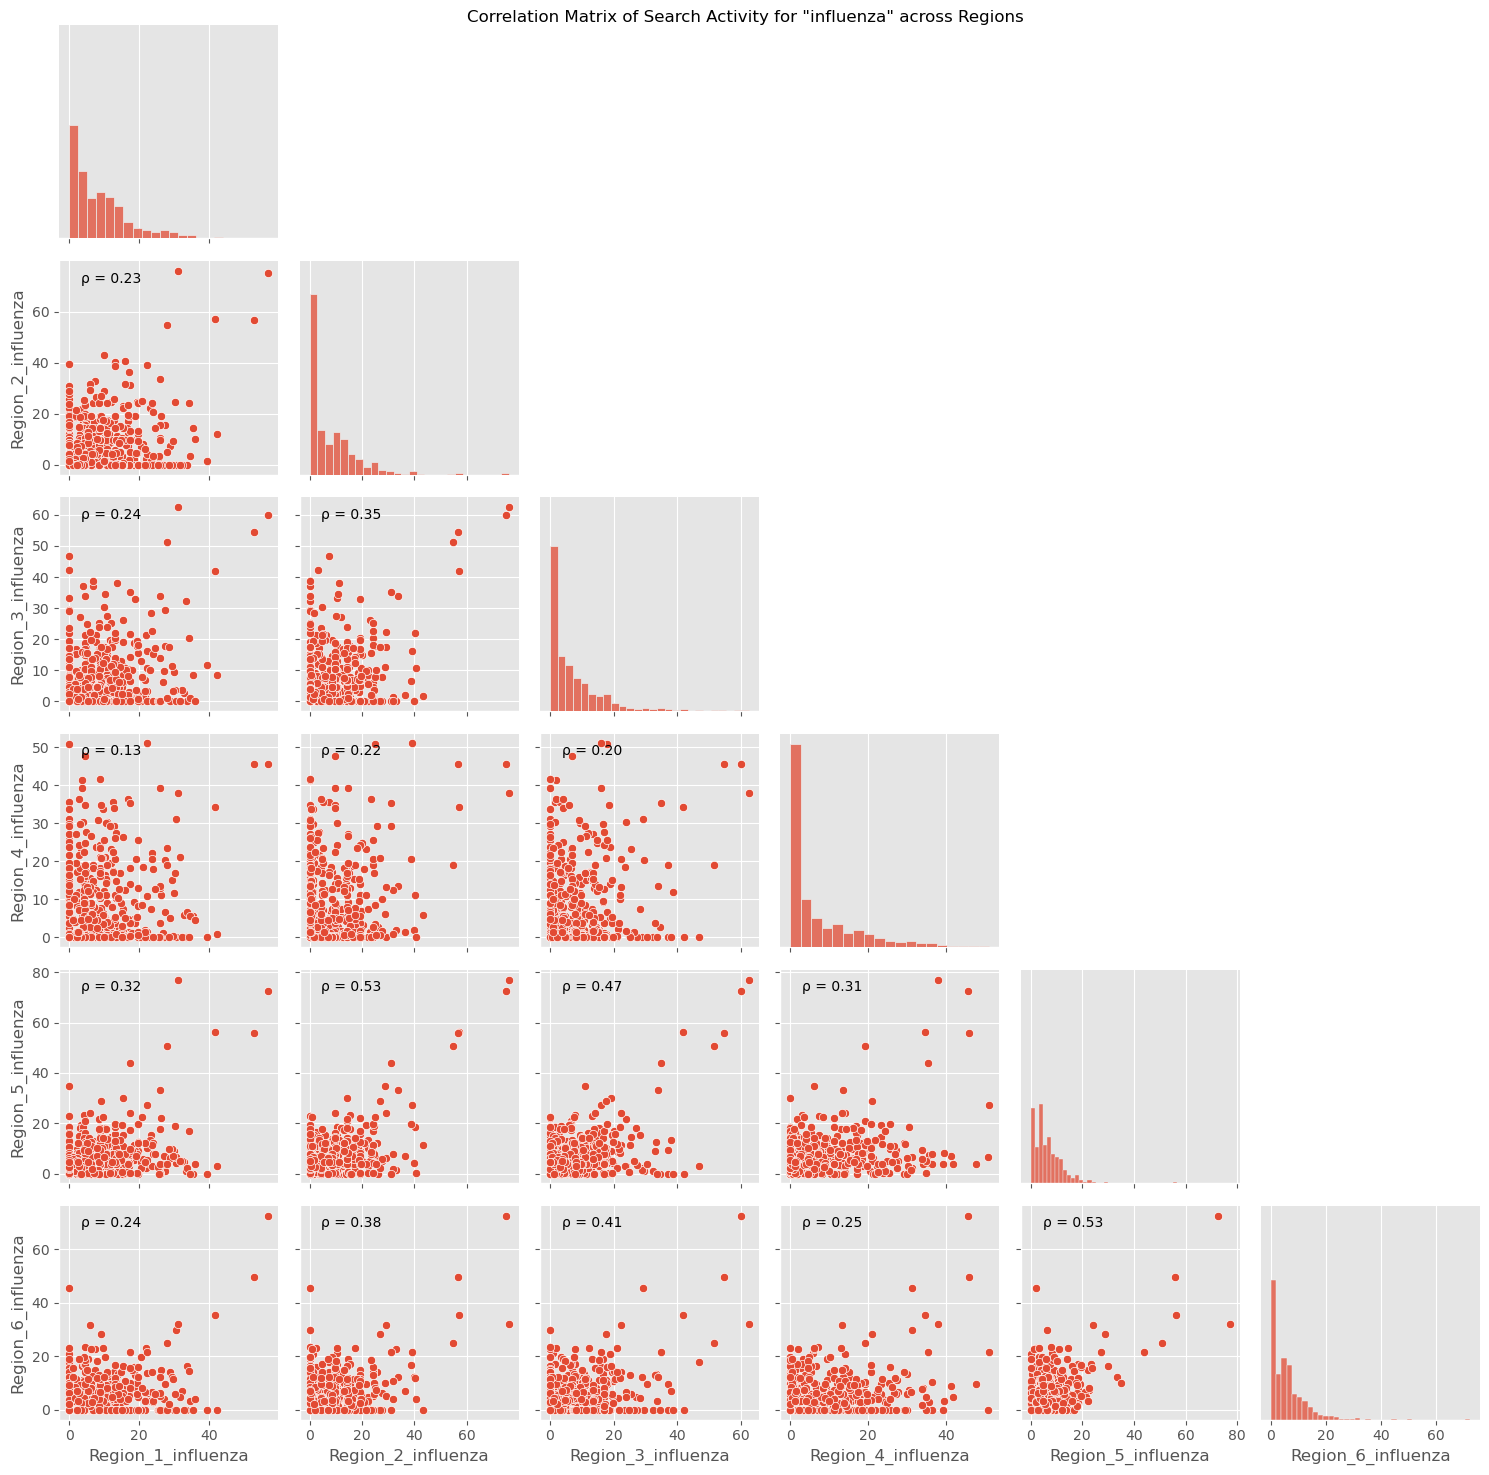

In [38]:

for query in google_plot.columns.levels[1]:
    plot_cols = regional_corr.loc[:, regional_corr.columns.str.contains(query)]
    g = sns.pairplot(plot_cols, kind='scatter', corner=True)

    # Calculate and annotate correlation coefficients
    for i, (row_i, row_data) in enumerate(plot_cols.iteritems()):
        for j, (col_j, col_data) in enumerate(plot_cols.iteritems()):
            if i > j:
                ax = g.axes[i, j]
                corr = col_data.corr(row_data)
                ax.text(0.1, 0.9, f"ρ = {corr:.2f}", transform=ax.transAxes)

    plt.suptitle(f'Correlation Matrix of Search Activity for "{query}" across Regions')

    # Show the plot
    plt.tight_layout()
    plt.show()

<h3>Decomposition of countrywide search activity for "Grippe" in Switzerland</h3>

In [ ]:
# Prepping data for decomposition
zh = google_trends_ch[[('Zürich', 'Grippe')]]
zh = zh.reset_index()
zh['Woche'] = pd.to_datetime(zh['Woche'])
zh = zh.set_index('Woche')

zh = zh[('Zürich', 'Grippe')]

zh = zh.asfreq('W-SUN')

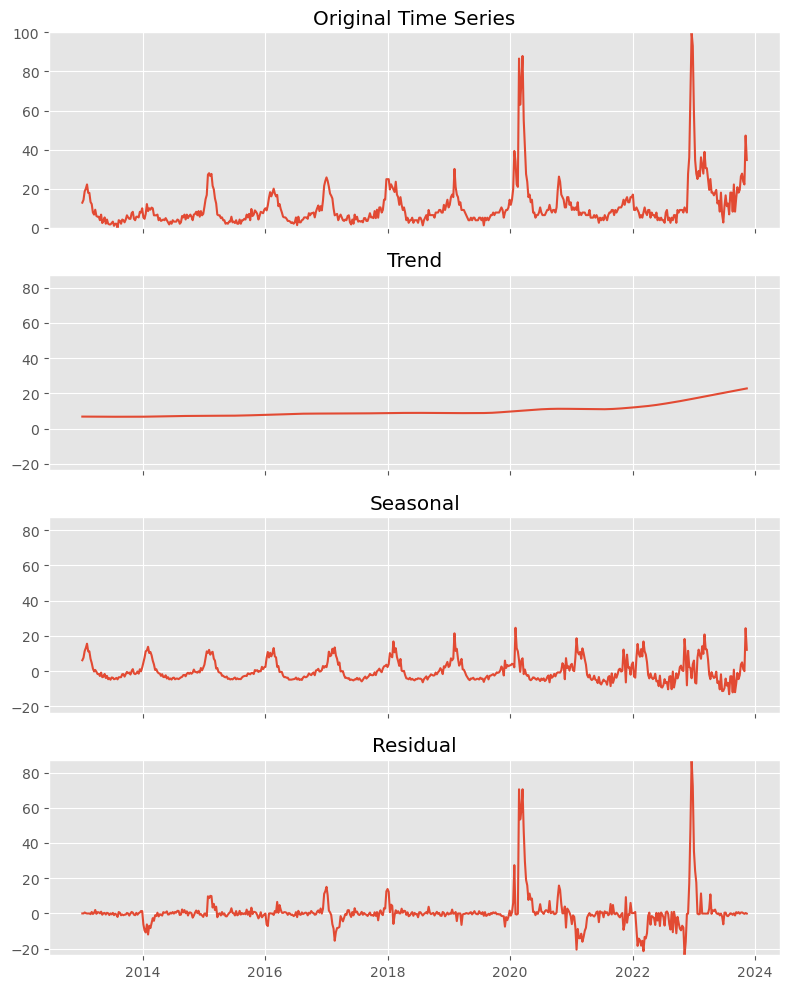

In [ ]:
# Apply STL decomposition
res = STL(zh, period=52, robust=True).fit()  # 'period=52' for weekly data

# Plot the results
fig, axs = plt.subplots(4, sharex=True, figsize=(8, 10))  # Increase the number of subplots to 4

# Determine the common y-axis range for the components (excluding the original time series for clarity)
common_ylim = (min(res.trend.min(), res.seasonal.min(), res.resid.min()),
               max(res.trend.max(), res.seasonal.max(), res.resid.max()))

# Plot the original time series
axs[0].plot(zh, label='Original')
axs[0].set_title('Original Time Series')
# Optionally, you can set the y-axis limit for the original time series to its own min and max
axs[0].set_ylim(zh.min(), zh.max())

# Plot each decomposed component with the same y-axis limits
axs[1].plot(res.trend)
axs[1].set_title('Trend')
axs[1].set_ylim(common_ylim)

axs[2].plot(res.seasonal)
axs[2].set_title('Seasonal')
axs[2].set_ylim(common_ylim)

axs[3].plot(res.resid)
axs[3].set_title('Residual')
axs[3].set_ylim(common_ylim)

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

<h3>Flu data</h3>
<ul>
    <li>Region 1: GE, NE, VD, VS</li> 
    <li>Region 2: BE, FR, JU </li>
    <li>Region 3: AG, BL, BS, SO </li>
    <li>Region 4: LU, NW, OW, SZ, UR, ZG</li> 
    <li>Region 5: AI, AR, GL, SG, SH, TG, ZH </li>
    <li>Region 6: GR, TI</li>
</ul> 